 卷积神经网络 (Convolutional Neural Networks, CNN) 是一类专门用于处理具有网格状拓扑结构数据（如图像）的深度学习模型。

CNN 是计算机视觉任务（如图像分类、目标检测和分割）的核心技术。

下面这张图展示了一个典型的卷积神经网络（CNN）的结构和工作流程，用于图像识别任务。
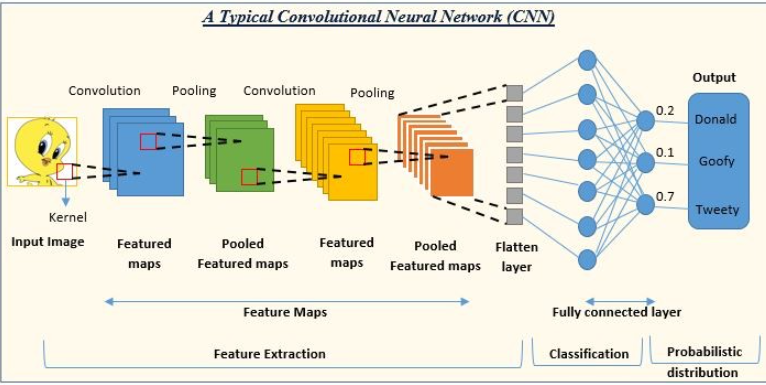

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),  # 转为张量
    transforms.Normalize((0.5,), (0.5,))  # 归一化到 [-1, 1]
])

# 加载 MNIST 数据集
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [4]:
# 使用nn.Module构建一个CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # 定义卷积层 ： 输入1通道 输出32通道，卷积核大小3x3
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        # 定义卷积层 ： 输入32通道， 输出64通道
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # 定义全连接层
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 64*7*7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [5]:
model = SimpleCNN()

In [6]:
print(model)

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [7]:
# 使用交叉熵损失和随机梯度下降优化器。
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 训练模型
# 训练5个epoch , 每个epoch后输出训练损失
num_epochs = 5
model.train()

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [8]:
for epoch in range(num_epochs):
    total_loss = 0
    for images, labels in train_loader:
        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")

Epoch [1/5], Loss: 0.2324
Epoch [2/5], Loss: 0.0527
Epoch [3/5], Loss: 0.0377
Epoch [4/5], Loss: 0.0287
Epoch [5/5], Loss: 0.0221


In [ ]:
# 测试模型
# 在测试集上评估模型的准确率
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(ouputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')